In [3]:
import os
os.chdir('..')

In [4]:
import pandas as pd
from vector_auto_regression import VectorAutoRegressor, adfuller_test
import matplotlib.pyplot as plt
from evaluation import Evaluator

# Consumer Confidence Model
This notebook evaluates the consumer confidence index(CCI) model. Conceptually, it is very similar to the evulation notebook of the sentiment analysis models, however, the CCI model needs a slightly different approach, because it is not implemented as a class like the other models.

For a more detailed, step-by-step explaination of the evaluation process, see the evaluation notebook.

### Import Consumer Confidence Index
Load the sentiment index straight from the file. Note that we need to modify the dataframe such that there are columns for both positive and negative sentiment, as this is required by the model evaluation functions.

In [5]:
cgi = pd.read_csv("data/consumer_confidence_index.csv", parse_dates=['TIME'], index_col='TIME', usecols = ['TIME', 'Value'])
cgi.index = cgi.index.to_period("M")

cgi["Positive Scores"] = cgi["Value"]
cgi["Negative Scores"] = cgi["Value"]

### Apply VAR to housing data (direct)

§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
POSITIVE SENTIMENT


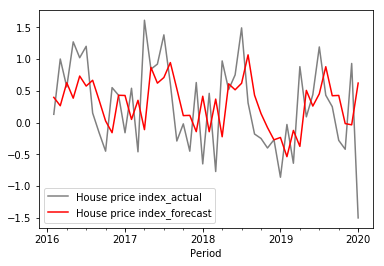

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, May, 2020
Time:                     10:47:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.85114
Nobs:                     189.000    HQIC:                  -5.99399
Log likelihood:           53.2664    FPE:                 0.00226268
AIC:                     -6.09127    Det(Omega_mle):      0.00210395
--------------------------------------------------------------------
Results for equation House price index
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.118236         0.046760            2.529           0.011
L1.House price index         0.503744         0.072930            6.907           0.000
L1.Positive Scores  

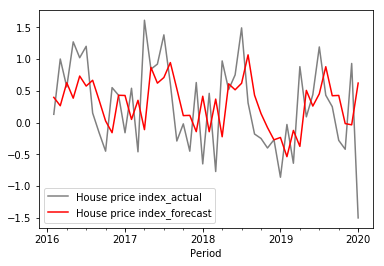

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, May, 2020
Time:                     10:47:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.85114
Nobs:                     189.000    HQIC:                  -5.99399
Log likelihood:           53.2664    FPE:                 0.00226268
AIC:                     -6.09127    Det(Omega_mle):      0.00210395
--------------------------------------------------------------------
Results for equation House price index
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.118236         0.046760            2.529           0.011
L1.House price index         0.503744         0.072930            6.907           0.000
L1.Negative Scores  

In [6]:
direct_data = "data/real_estate_data/direct/england.csv"
ev = Evaluator(model=None, articles= None, sentiment = cgi, housing_index=direct_data, market_data_column = "House price index")

In [7]:
ev.print_latex_table(sentiment = "negative", housing_label = "Housing price index", sentiment_label = "CCI")

Constant & \num{1.182e-01} & \num{4.676e-02} & $2.529$ & $0.011$ \tnote{*} & \num{2.599e-02} & \num{2.105e-01} \\
Housing price index \textit{(-1)} & \num{5.037e-01} & \num{7.293e-02} & $6.907$ & $0.0$ \tnote{*} & \num{3.599e-01} & \num{6.476e-01} \\
Housing price index \textit{(-2)} & \num{9.890e-02} & \num{8.173e-02} & $1.21$ & $0.226$  & \num{-6.231e-02} & \num{2.601e-01} \\
Housing price index \textit{(-3)} & \num{6.924e-02} & \num{7.132e-02} & $0.971$ & $0.332$  & \num{-7.144e-02} & \num{2.099e-01} \\
CCI \textit{(-1)} & \num{7.148e-01} & \num{4.836e-01} & $1.478$ & $0.139$  & \num{-2.392e-01} & \num{1.669e+00} \\
CCI \textit{(-2)} & \num{-4.948e-01} & \num{7.378e-01} & $-0.671$ & $0.502$  & \num{-1.950e+00} & \num{9.607e-01} \\
CCI \textit{(-3)} & \num{7.768e-01} & \num{4.934e-01} & $1.574$ & $0.115$  & \num{-1.965e-01} & \num{1.750e+00} \\


### Apply VAR to housing data (Securitized)

§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
POSITIVE SENTIMENT


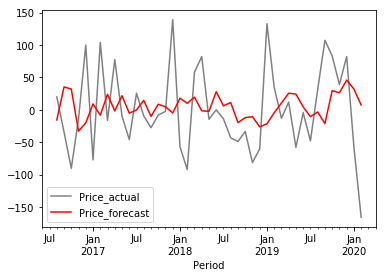

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, May, 2020
Time:                     10:47:59
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.39478
Nobs:                     166.000    HQIC:                   4.23886
Log likelihood:          -800.070    FPE:                    62.3287
AIC:                      4.13232    Det(Omega_mle):         57.3868
--------------------------------------------------------------------
Results for equation Price
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      3.907272         7.144587            0.547           0.584
L1.Price                   0.091556         0.079031            1.158           0.247
L1.Positive Scores       193.877222     

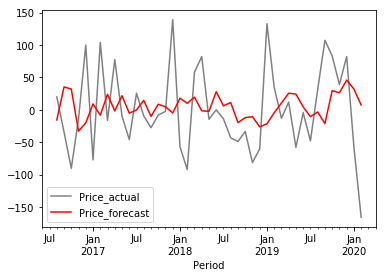

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, May, 2020
Time:                     10:48:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.39478
Nobs:                     166.000    HQIC:                   4.23886
Log likelihood:          -800.070    FPE:                    62.3287
AIC:                      4.13232    Det(Omega_mle):         57.3868
--------------------------------------------------------------------
Results for equation Price
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      3.907272         7.144587            0.547           0.584
L1.Price                   0.091556         0.079031            1.158           0.247
L1.Negative Scores       193.877222     

In [8]:
securitized_data = 'data/real_estate_data/securitized/FTSE EPRA_NAREIT UK Historical Data.csv'
ev = Evaluator(model=None, articles= None, sentiment = cgi, housing_index=securitized_data, market_data_column = "Price", date_format="%b %y")

In [9]:
ev.print_latex_table(sentiment = "negative", housing_label = "FTSE EPRA Nareit", sentiment_label = "CCI")

Constant & \num{3.907e+00} & \num{7.145e+00} & $0.547$ & $0.584$  & \num{-1.020e+01} & \num{1.801e+01} \\
FTSE EPRA Nareit \textit{(-1)} & \num{9.156e-02} & \num{7.903e-02} & $1.158$ & $0.247$  & \num{-6.449e-02} & \num{2.476e-01} \\
FTSE EPRA Nareit \textit{(-2)} & \num{3.304e-02} & \num{8.026e-02} & $0.412$ & $0.681$  & \num{-1.254e-01} & \num{1.915e-01} \\
FTSE EPRA Nareit \textit{(-3)} & \num{1.464e-01} & \num{7.987e-02} & $1.833$ & $0.067$  & \num{-1.133e-02} & \num{3.041e-01} \\
CCI \textit{(-1)} & \num{1.939e+02} & \num{8.509e+01} & $2.279$ & $0.023$ \tnote{*} & \num{2.588e+01} & \num{3.619e+02} \\
CCI \textit{(-2)} & \num{-2.132e+02} & \num{1.304e+02} & $-1.635$ & $0.102$  & \num{-4.707e+02} & \num{4.431e+01} \\
CCI \textit{(-3)} & \num{7.786e+01} & \num{8.517e+01} & $0.914$ & $0.361$  & \num{-9.031e+01} & \num{2.460e+02} \\
